In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from IPython.display import Image
import pydotplus

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train_data.csv to Train_data.csv


In [3]:
data = pd.read_csv('Train_data.csv')
data.head()

Age        EdLevel Gender MainBranch  YearsCodePro  ComputerSkills Employed
0  <35         Master    Man        Dev             4               4       No
1  <35  Undergraduate    Man        Dev             5              12      Yes
2  <35         Master    Man        Dev             6               7       No
3  <35  Undergraduate    Man        Dev             6              13       No
4  >35            PhD    Man     NotDev            30               2       No

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1000 non-null   object
 1   EdLevel         1000 non-null   object
 2   Gender          1000 non-null   object
 3   MainBranch      1000 non-null   object
 4   YearsCodePro    1000 non-null   int64 
 5   ComputerSkills  1000 non-null   int64 
 6   Employed        1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
print("Dữ liệu thiếu: ", data.isnull().sum())
print("Dữ liệu trống: ",data.isna().values.any())

Dữ liệu thiếu:  Age               0
EdLevel           0
Gender            0
MainBranch        0
YearsCodePro      0
ComputerSkills    0
Employed          0
dtype: int64
Dữ liệu trống:  False


In [6]:
from sklearn.preprocessing import LabelEncoder #Import LabelEncoder
label_encoder = LabelEncoder()

for col in ['Age', 'EdLevel', 'Gender','MainBranch', 'Employed']: # Loop through the columns you want to encode.
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col]) # Apply label encoding to the correct columns.

In [7]:
#feature variables
x=data.drop(['Employed'], axis=1)
x

Age  EdLevel  Gender  MainBranch  YearsCodePro  ComputerSkills
0      0        0       0           0             4               4
1      0        4       0           0             5              12
2      0        0       0           0             6               7
3      0        4       0           0             6              13
4      1        3       0           1            30               2
..   ...      ...     ...         ...           ...             ...
995    0        4       0           0             2               3
996    0        0       0           0             5              12
997    1        0       0           0            15              25
998    1        3       0           0            15              12
999    0        4       0           1             9              10

[1000 rows x 6 columns]

In [8]:
y=data.Employed
y

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    0
999    0
Name: Employed, Length: 1000, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [11]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 73.0


In [12]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[72, 30],
       [24, 74]])

In [13]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [15]:
features=x.columns
features

Index(['Age', 'EdLevel', 'Gender', 'MainBranch', 'YearsCodePro',
       'ComputerSkills'],
      dtype='object')

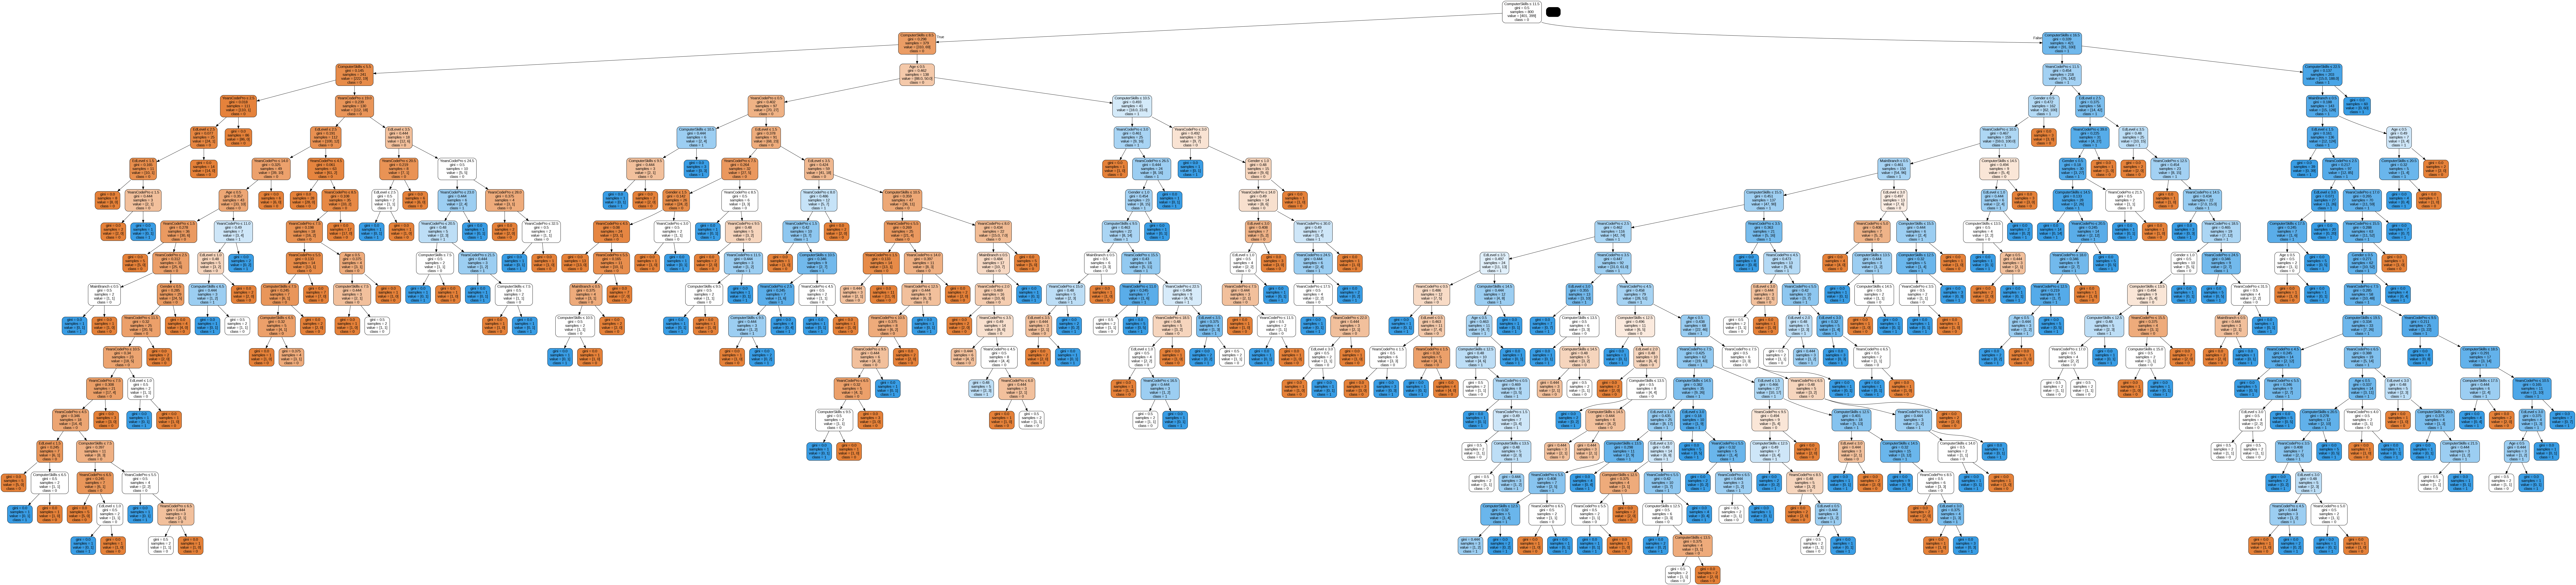

In [16]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('recruitment.png')
Image(graph.create_png())

In [17]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 81.0


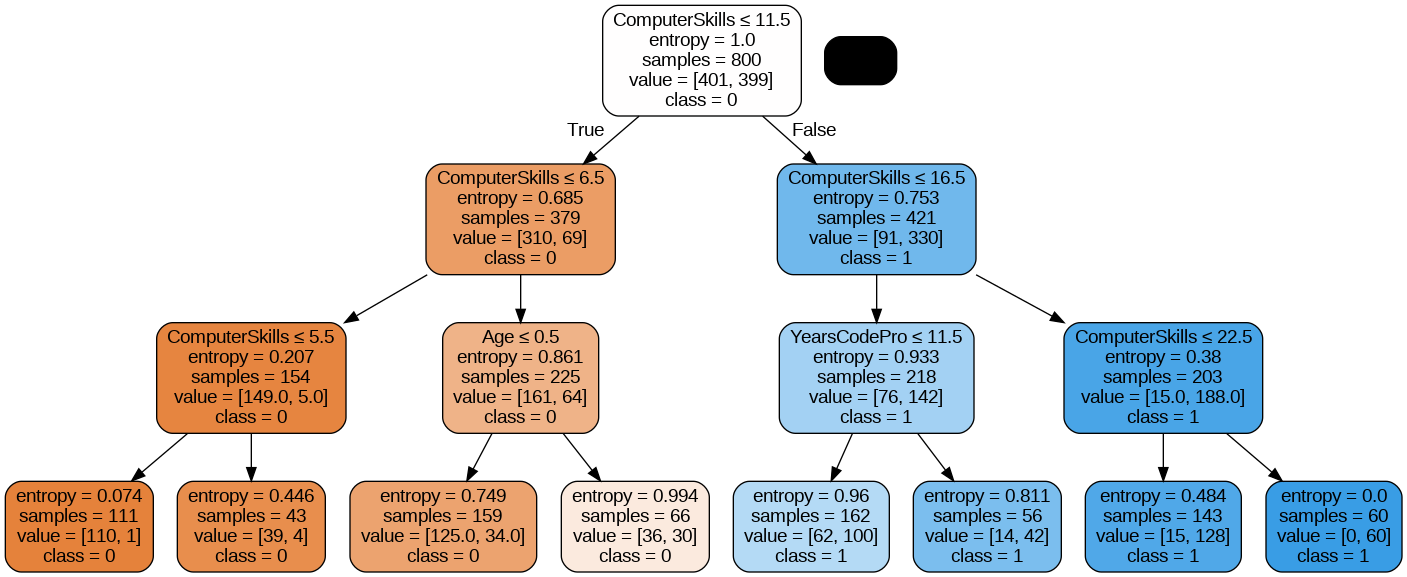

In [19]:
#Better Decision Tree Visualisation
#from sklearn.externals.six import StringIO # This line is causing the error
from io import StringIO # Use io.StringIO instead
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('recruitment.png')
Image(graph.create_png())